# Project: Wrangle and Analyze Data

## Table of Contents
### [1. Gathering Data](#gat)
### [2. Assessing Data](#ass)
### [3. Cleaning Data](#clean)
### [4. Analyzing and Visualizing Data](#stor)

<a id='gat'></a>
## 1. Gathering Data

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib as plt
import seaborn as sns
%matplotlib inline


### 1.1 Archive Data

In [2]:
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 1.2 Pred_image Data

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open (url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [4]:
pred_image = pd.read_csv(url.split('/')[-1], sep = '\t')
pred_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 1.3 Tweet Data

In [5]:
tweet = []
with open('tweet-json.txt','r') as file:
    for line in file:
        additional_data = json.loads(line)
        tweet.append({
            'tweet_id': additional_data['id_str'],
            'retweet_count': additional_data['retweet_count'],
            'favorite_count': additional_data['favorite_count']
        })

In [6]:
tweet_df = pd.DataFrame(tweet)
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id='ass'></a>
## 2. Assessing Data

### 2.1 Assessing Archive Data

In [7]:
pd.set_option('max_colwidth',200)
archive.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [8]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
archive.duplicated().sum()

0

In [10]:
tweet_df.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [11]:
archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
            ... 
Alejandro      1
Bobby          1
Bookstore      1
Chuq           1
Trip           1
Name: name, Length: 957, dtype: int64

### Archive Data Issue

- The data type of tweet_id should be object

- The data type of timestamp, retweeted_status_timestamp should be datetime

- Some are retweets (We only want original ratings)

- Some columns are not necessary for the analysis

- Poor readability of the data in source column

- some names in name column are false

- name, doggo, floofer, pupper, puppo has missing values with "None" instead of NaN

- doggo, floofer, pupper, puppo these 4 variables shoule be combined into one categorical variable Dog Type

### 2.2 Assessing Pred_image Data

In [12]:
pred_image.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [13]:
pred_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
pred_image.duplicated().sum()

0

In [15]:
tweet_df.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

### Pred_image Data Issue
- Some breeds of dogs have lowercase initials
- The type of tweet_id should be object

### 2.3 Assessing Tweet Data

In [16]:
tweet_df.head(10)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [17]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [18]:
tweet_df.duplicated().sum()

0

In [19]:
tweet_df.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

### Tweet Data Issue
- No missing data

### 2.4 Quality Issue and Tidiness Issue

### Quality Issue
#### Archive Data Issue
- The data type of tweet_id should be object

- The data type of timestamp, retweeted_status_timestamp should be datetime

- Some are retweets (We only want original ratings)

- Some columns are not necessary for the analysis

- Poor readability of the data in source column

- some names in name column are false

#### Pred_image Data Issue
- Some breeds of dogs have lowercase initials
- The type of tweet_id should be object

### Tidiness Issue

- doggo, floofer, pupper, puppo these 4 variables shoule be combined into one categorical variable Dog Type
- 3 dataframe should merge to be one


<a id='clean'></a>
## 3. Cleaning Data

In [20]:
archive_clean = archive.copy()
pred_image_clean = pred_image.copy()
tweet_df_clean = tweet_df.copy()

In [21]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### 3.1 Quality
#### 3.1.1 Cleaning Archive Data

#### 1) The data type of tweet_id should be object

#### Define
Change the data type of tweet_id to object.

#### Code

In [22]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)

#### Test

In [23]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### 2) The data type of timestamp, retweeted_status_timestamp should be datetime

#### Define

Change the data type of timestamp, retweeted_status_timestamp to datatime.

#### Code

In [24]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'],format = "%Y/%m/%d %H:%M:%S")
archive_clean['retweeted_status_timestamp'] = pd.to_datetime(archive_clean['retweeted_status_timestamp'])

#### Test

In [25]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### 3) Some are retweets (We only want original ratings)

#### Define
Select original ratings.

#### Code

In [26]:
# Count the number of retweets
len( archive_clean[archive_clean['retweeted_status_id'].isnull() == False])

181

In [27]:
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isnull() == True]

#### Test

In [28]:
len( archive_clean[archive_clean['retweeted_status_id'].isnull() == False])

0

#### 4) Some columns are not necessary for the analysis

#### Define
Delete these columns ('in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls') which are not necessary for the analysis

#### Code

In [29]:
archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','expanded_urls'], axis=1, inplace=True)

#### Test

In [30]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### 5) Poor readability of the data in source column

#### Define
Extract the user source according to the source column and put it in the new column 'user_source'.

#### Code

In [31]:
import re 
relink = '<a href=".*">(.*)</a>'
user_source = []
for item in archive_clean['source']:
    user_type = re.findall(relink, item)
    user_source.append(user_type)

archive_clean['user_source'] = user_source

In [32]:
archive_clean.drop(['source'], axis=1, inplace=True)

#### Test

In [33]:
archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,user_source
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None,None,None,[Twitter for iPhone]
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,None,None,None,[Twitter for iPhone]
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,None,None,None,[Twitter for iPhone]
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,None,None,None,None,[Twitter for iPhone]
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,None,None,None,None,[Twitter for iPhone]


#### 6) Some names in name column are false

#### Define
Remove None and items with lowercase initials in name column.

#### Code

In [34]:
archive_clean.name.value_counts()

None       680
a           55
Charlie     11
Lucy        11
Cooper      10
          ... 
Anna         1
Ralph        1
Kyro         1
Dudley       1
Trip         1
Name: name, Length: 956, dtype: int64

In [35]:
archive_clean.name.replace('None', value = np.nan, inplace=True)
archive_clean.name.replace(r'^([a-z])', value = np.nan, regex=True, inplace=True)
archive_clean.dropna(subset=['name'], inplace=True)

#### Test

In [36]:
archive_clean.name.value_counts()

Charlie    11
Lucy       11
Cooper     10
Oliver     10
Tucker      9
           ..
Timison     1
Anna        1
Ralph       1
Kyro        1
Trip        1
Name: name, Length: 930, dtype: int64

In [37]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 2325
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1391 non-null   object             
 1   timestamp           1391 non-null   datetime64[ns, UTC]
 2   text                1391 non-null   object             
 3   rating_numerator    1391 non-null   int64              
 4   rating_denominator  1391 non-null   int64              
 5   name                1391 non-null   object             
 6   doggo               1391 non-null   object             
 7   floofer             1391 non-null   object             
 8   pupper              1391 non-null   object             
 9   puppo               1391 non-null   object             
 10  user_source         1391 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 130.4+ KB


#### 7) doggo, floofer, pupper, puppo these 4 variables shoule be combined into one categorical variable Dog Type

#### Define

Combine columns for dog types and remove rows where one dog has two types.

#### Code

In [38]:
dog = ['doggo', 'floofer', 'pupper', 'puppo']
Dog_Stage = archive_clean[dog].replace('None', '')

In [39]:
archive_clean['Dog_Stage'] = Dog_Stage.apply(lambda x: ''.join(x), axis=1).replace('^$', 'None', regex=True)

In [40]:
archive_clean.drop(dog, axis=1, inplace=True)
archive_clean

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,user_source,Dog_Stage
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,[Twitter for iPhone],None
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,[Twitter for iPhone],None
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,[Twitter for iPhone],None
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,[Twitter for iPhone],None
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,[Twitter for iPhone],None
...,...,...,...,...,...,...,...,...
2315,666691418707132416,2015-11-17 18:56:35+00:00,This is Christoper. He is a spotted Penne. Can easily navigate stairs. 8/10 https://t.co/bg4TqvvkuF,8,10,Christoper,[Twitter for iPhone],None
2317,666644823164719104,2015-11-17 15:51:26+00:00,This is Jimothy. He is a Botwanian Gouda. Can write (impressive). Very erect tail. Still looking for hoco date. 9/10 https://t.co/LEkZjZxESQ,9,10,Jimothy,[Twitter for iPhone],None
2318,666454714377183233,2015-11-17 03:16:00+00:00,I'll name the dogs from now on. This is Kreggory. He does parkour. 10/10 https://t.co/uPqPeXAcua,10,10,Kreggory,[Twitter for iPhone],None
2319,666447344410484738,2015-11-17 02:46:43+00:00,This is Scout. She is a black Downton Abbey. Isn't afraid to get dirty. 9/10 nothing bad to say https://t.co/kH60oka1HW,9,10,Scout,[Twitter for iPhone],None


In [41]:
archive_clean.Dog_Stage.value_counts()

None           1207
pupper          121
doggo            38
puppo            16
floofer           5
doggopupper       4
Name: Dog_Stage, dtype: int64

In [42]:
archive_clean = archive_clean.drop(archive_clean[archive_clean["Dog_Stage"] == 'doggopupper'].index)

#### Test

In [43]:
archive_clean.Dog_Stage.value_counts()

None       1207
pupper      121
doggo        38
puppo        16
floofer       5
Name: Dog_Stage, dtype: int64

In [44]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 0 to 2325
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1387 non-null   object             
 1   timestamp           1387 non-null   datetime64[ns, UTC]
 2   text                1387 non-null   object             
 3   rating_numerator    1387 non-null   int64              
 4   rating_denominator  1387 non-null   int64              
 5   name                1387 non-null   object             
 6   user_source         1387 non-null   object             
 7   Dog_Stage           1387 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 97.5+ KB


#### 3.1.2 Cleaning Pred_image Data

#### 1)  Some breeds of dogs have lowercase initials

#### Define

Capitalize the first letter of each word in the columns p1, p2, p3.

#### Code

In [45]:
pred_image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [46]:
pred_image_clean.p1 = pred_image_clean.p1.str.capitalize()
pred_image_clean.p2 = pred_image_clean.p2.str.capitalize()
pred_image_clean.p3 = pred_image_clean.p3.str.capitalize()

#### Test

In [47]:
pred_image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 2)  The type of tweet_id should be object

#### Define

Change the data type of tweet_id to object.

#### Code

In [48]:
pred_image_clean.tweet_id = pred_image_clean['tweet_id'].astype(str)

#### Test

In [49]:
pred_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### 3.2 Combine three tables

#### Define

Combine three tables according to tweet_id

#### Code

In [50]:
archive_master = pd.merge(archive_clean, pred_image_clean, on='tweet_id', how='inner')
archive_master = pd.merge(archive_master, tweet_df_clean, on='tweet_id', how='inner')

#### Test

In [51]:
archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1346 entries, 0 to 1345
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1346 non-null   object             
 1   timestamp           1346 non-null   datetime64[ns, UTC]
 2   text                1346 non-null   object             
 3   rating_numerator    1346 non-null   int64              
 4   rating_denominator  1346 non-null   int64              
 5   name                1346 non-null   object             
 6   user_source         1346 non-null   object             
 7   Dog_Stage           1346 non-null   object             
 8   jpg_url             1346 non-null   object             
 9   img_num             1346 non-null   int64              
 10  p1                  1346 non-null   object             
 11  p1_conf             1346 non-null   float64            
 12  p1_dog              1346 non-null 

In [52]:
archive_master.to_csv('twitter_archive_master.csv', index=False)

<a id='stor'></a>
## 4. Analyzing and Visualizing Data

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
archive_master.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,user_source,Dog_Stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,[Twitter for iPhone],None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,[Twitter for iPhone],None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,[Twitter for iPhone],None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,[Twitter for iPhone],None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,[Twitter for iPhone],None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


In [55]:
archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1346 entries, 0 to 1345
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1346 non-null   object             
 1   timestamp           1346 non-null   datetime64[ns, UTC]
 2   text                1346 non-null   object             
 3   rating_numerator    1346 non-null   int64              
 4   rating_denominator  1346 non-null   int64              
 5   name                1346 non-null   object             
 6   user_source         1346 non-null   object             
 7   Dog_Stage           1346 non-null   object             
 8   jpg_url             1346 non-null   object             
 9   img_num             1346 non-null   int64              
 10  p1                  1346 non-null   object             
 11  p1_conf             1346 non-null   float64            
 12  p1_dog              1346 non-null 

### 4.1 The proportion of dog at various stage

Conclusion 1: The proportion of pupper are the most.

In [56]:
archive_master["Dog_Stage"].value_counts()

None       1173
pupper      117
doggo        36
puppo        15
floofer       5
Name: Dog_Stage, dtype: int64

Text(0.5, 1.0, 'The Proportion of Dog at Various Stages')

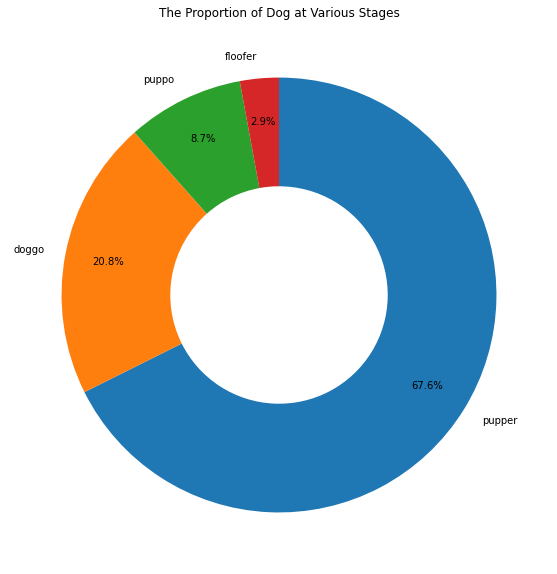

In [57]:
dog_stage = archive_master[archive_master['Dog_Stage'] != "None"]
dogs = dog_stage["Dog_Stage"].value_counts()
plt.figure(figsize=(15, 10))
plt.pie(dogs, labels=dogs.index, autopct='%.1f%%', pctdistance= 0.8, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.5} )
plt.title('The Proportion of Dog at Various Stages')

### 4.2 Number of Tweets Posted According to Time

Conclusion 2: The number of tweets posted was the highest at 1 am.

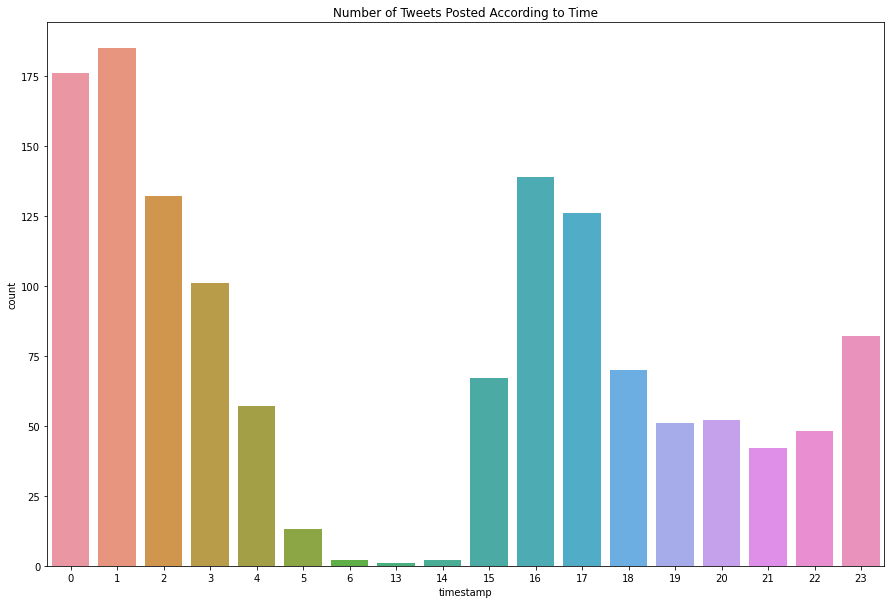

In [58]:
s = archive_master.timestamp.dt.hour
plt.figure(figsize=(15, 10))
p = sns.countplot(x=s.index,data=s)
p.set_title("Number of Tweets Posted According to Time")
plt.show()

### 4.3 The Most Popular Dog Name

Conclusion 3: The most popular dog name is Charlie.

In [59]:
archive_master['name'].value_counts()

Charlie    11
Oliver     10
Lucy       10
Cooper     10
Tucker      9
           ..
Timison     1
Anna        1
Ralph       1
Kyro        1
Godi        1
Name: name, Length: 910, dtype: int64

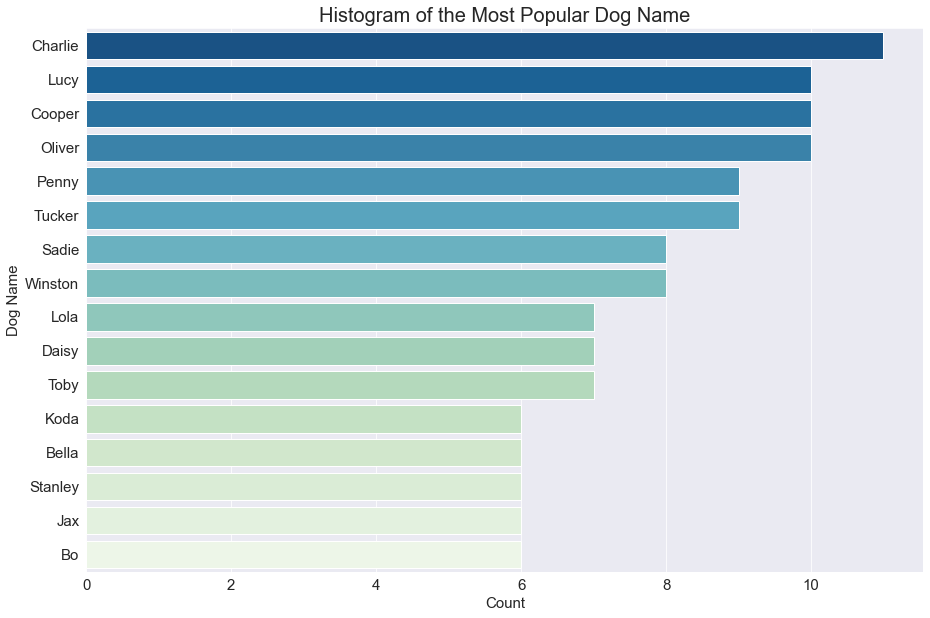

In [60]:
popular_name = archive_master.groupby('name').filter(lambda x: len(x) >= 6)
popular_n = popular_name['name'].value_counts()

plt.figure(figsize=(15, 10))
sns.set_style("darkgrid")
gen = sns.barplot(x= popular_n, y= popular_n.index,orient= "h",palette="GnBu_r")
gen.set_title("Histogram of the Most Popular Dog Name",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
gen.set_xlabel("Count",fontsize=15)
gen.set_ylabel("Dog Name",fontsize=15);

### 4.4 Retweet_count and Favorite_count

Conclusion 4: retweet_count and favorite_count have a strong positive correlation, i.e. the larger the retweet_count, the larger the favorite_count in general.

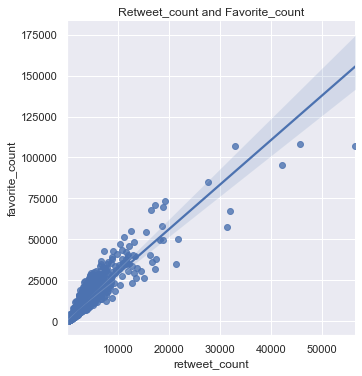

In [61]:
sns.set_style("white")
sns.set(style="darkgrid")
sns.lmplot(x = 'retweet_count', y='favorite_count',data = archive_master)
plt.title('Retweet_count and Favorite_count')
plt.show()